In [1]:
from metrics import plot_confusion_matrix, display_classification_report, plot_visual_word_vocabulary
from datasets import ObjectDataset, FlowerDataset, load_dataset
from bag_of_visual_words import BagOfVisualWords

import matplotlib.pyplot as plt
import numpy as np
import cv2

### Objects Dataset:

In [3]:
root_path = "Datasets/Objects"

train_images, train_labels = load_dataset(
    ObjectDataset, 
    root_path, 
    mode="Train"
)

test_images, test_labels = load_dataset(
    ObjectDataset, 
    root_path, 
    mode="Test"
)

        Total instances: 8
Correct classifications: 8
         Accuracy score: 100.0


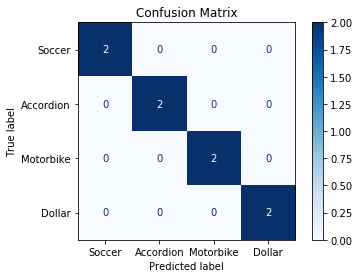

              precision    recall  f1-score   support

      Soccer       1.00      1.00      1.00         2
   Accordion       1.00      1.00      1.00         2
   Motorbike       1.00      1.00      1.00         2
      Dollar       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [4]:
feature_detector = "SIFT"
num_clusters = 50

BoVW = BagOfVisualWords(
    num_clusters,
    feature_detector,
)

BoVW.train(train_images, train_labels)

predictions = BoVW.test(test_images, test_labels)

classes = list(ObjectDataset.object_categories.values())
plot_confusion_matrix(test_labels, predictions, classes)
display_classification_report(test_labels, predictions, classes)

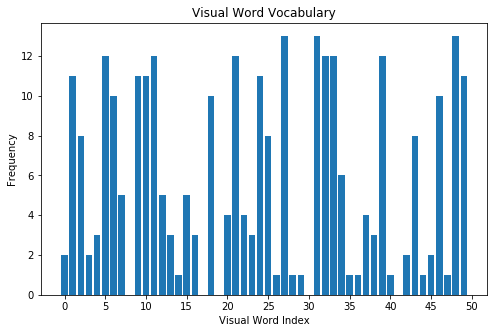

In [5]:
plot_visual_word_vocabulary(BoVW.code_book, BoVW.num_clusters)

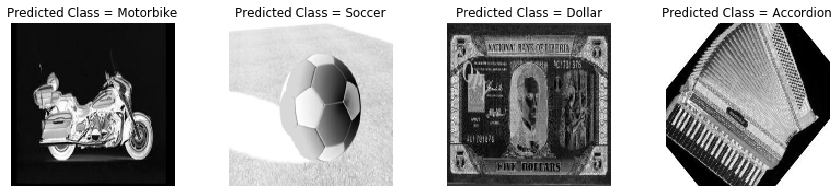

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
for axis, image, prediction in zip(axes, test_images, predictions):
    axis.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    axis.set_title(f"Predicted Class = {ObjectDataset.object_categories.get(prediction)}")
    axis.axis("off")

### Flowers Dataset:

In [2]:
root_path = "Datasets/Flowers"

train_images, train_labels = load_dataset(
    FlowerDataset, 
    root_path, 
    mode="Train"
)

test_images, test_labels = load_dataset(
    FlowerDataset, 
    root_path, 
    mode="Test"
)

        Total instances: 552
Correct classifications: 283
         Accuracy score: 51.300000000000004


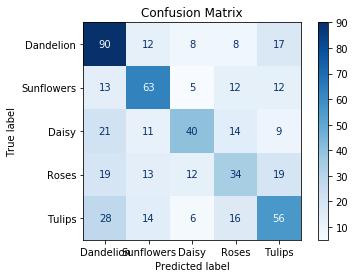

              precision    recall  f1-score   support

   Dandelion       0.53      0.67      0.59       135
  Sunflowers       0.56      0.60      0.58       105
       Daisy       0.56      0.42      0.48        95
       Roses       0.40      0.35      0.38        97
      Tulips       0.50      0.47      0.48       120

    accuracy                           0.51       552
   macro avg       0.51      0.50      0.50       552
weighted avg       0.51      0.51      0.51       552



In [3]:
feature_detector = "SIFT"
num_clusters = 50

BoVW = BagOfVisualWords(
    num_clusters,
    feature_detector,
)

BoVW.train(train_images, train_labels, optimize_params=False)

predictions = BoVW.test(test_images, test_labels)

classes = list(FlowerDataset.flower_categories.values())
plot_confusion_matrix(test_labels, predictions, classes)
display_classification_report(test_labels, predictions, classes)

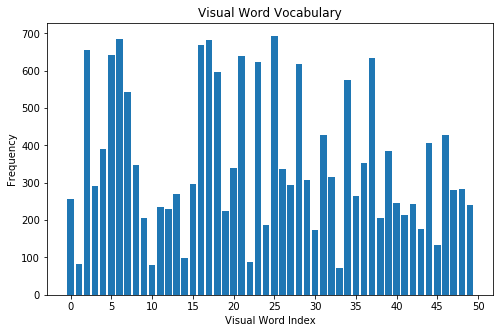

In [4]:
plot_visual_word_vocabulary(BoVW.code_book, BoVW.num_clusters)